<a href="https://colab.research.google.com/github/aitesam961/fuzzy-fishtick/blob/main/MADALINE_Rule_II_v1p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MADALINE: Rule-2
## Key Features:

Unlike Rule I, where weight updates are calculated based on error for each
neuron separately, Rule II performs updates in a layer-wise fashion, taking
into account the global performance of the network. In Rule II, we aim to
update weights only when an update reduces the overall error significantly.


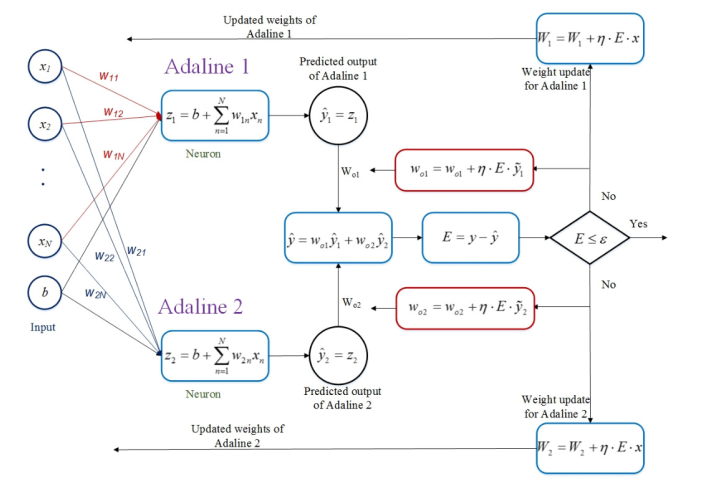

Epoch: 0 w1: 0.5 w2: 0.7 E: 0.21700000000000005
Epoch: 1 w1: 0.5090055 w2: 0.7090055 E: 0.20804025505033052
Epoch: 2 w1: 0.5176391705845887 w2: 0.7176391705845887 E: 0.19925925560000385
Epoch: 3 w1: 0.5259084296919889 w2: 0.7259084296919889 E: 0.19066954167064554
Epoch: 4 w1: 0.5338212156713207 w2: 0.7338212156713206 E: 0.18228242858110708
Epoch: 5 w1: 0.5413859364574366 w2: 0.7413859364574366 E: 0.1741079438823519
Epoch: 6 w1: 0.5486114161285542 w2: 0.7486114161285542 E: 0.16615478866896682
Epoch: 7 w1: 0.5555068398583164 w2: 0.7555068398583163 E: 0.15843032148342273
Epoch: 8 w1: 0.5620816981998784 w2: 0.7620816981998784 E: 0.1509405627480815
Epoch: 9 w1: 0.5683457315539238 w2: 0.7683457315539237 E: 0.14369021746173105
Epoch: 10 w1: 0.5743088755785856 w2: 0.7743088755785855 E: 0.13668271377919744
Epoch: 11 w1: 0.5799812082004222 w2: 0.7799812082004222 E: 0.12992025504847912
Epoch: 12 w1: 0.585372898784934 w2: 0.785372898784934 E: 0.12340388290186062
Epoch: 13 w1: 0.5904941599253613 w2

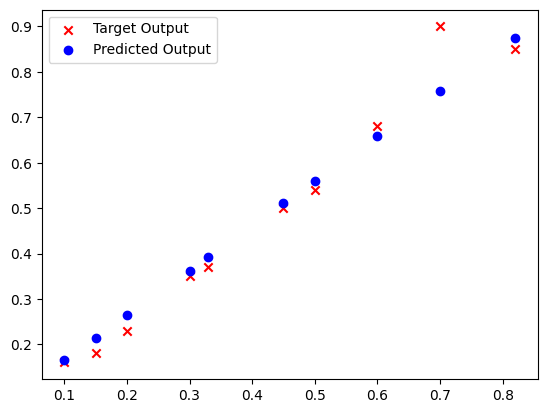

In [6]:
# input observations

x = [0.10, 0.30, 0.60, 0.70, 0.20, 0.45, 0.50, 0.82, 0.15, 0.33]
N = len(x)

# bias

b1 = 0.01
b2 = 0.01


# weights
w1 = 0.5
w2 = 0.7

# weights for pred. output
wo1 = 0.5
wo2 = 0.5

# learning rate
eta = 0.01

# targeted output
y = [0.16, 0.35, 0.68, 0.90, 0.23, 0.50, 0.54, 0.85, 0.18, 0.37]

max_epochs = 10000
threshold  = 0.0000000001

# runtime variables
E = 0

dw1 = 0
dw2 = 0

dy1 = [0.0]*N
dy2 = [0.0]*N

error1 = [0.0]*N
error2 = [0.0]*N

dy  = [0.0]*N



for epochs in range(max_epochs):
  for index in range(N):

    # ADALINE-1
    dy1[index] = w1 * x[index] + b1

    # ADALINE-2
    dy2[index] = w2 * x[index] + b2

    # calculate dy
    dy[index] = wo1 * dy1[index] + wo2 * dy2[index]

  # error check
  E = (1/N)* sum([y[i] - dy[i] for i in range(N)])

  if((E)**2 < threshold):
    print("CONVERGED.....")
    break

  print("Epoch:", epochs, "w1:",w1, "w2:",w2, "E:",E, )

  # weight update - outer layer

  w_sum = 0
  for i in range(N):
    w_sum += dy1[i]
  wo1 += eta* E * w_sum

  w_sum = 0
  for i in range(N):
    w_sum += dy2[i]
  wo2 += eta* E * w_sum

  # weight update - hidden layer

  w_sum = 0
  for i in range(N):
    w_sum += x[i]
  dw1 = eta* E * w_sum
  w1 = w1 + dw1
  b1 += eta * E

  w_sum = 0
  for i in range(N):
    w_sum += x[i]
  dw2 = eta* E * w_sum
  w2 = w2 + dw2
  b2 += eta * E


print("===========================================================================================================")
print("dy:",dy )
print("===========================================================================================================")


import matplotlib.pyplot as plt

plt.scatter(x, y, marker='x', color='red', label='Target Output')
plt.scatter(x, dy, marker='o', color='blue', label='Predicted Output')
plt.legend()

plt.show()
